In [1]:
import openpyxl 
import numpy as np
import urllib.request
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

Crawling

In [2]:
url = 'http://www.op.gg/champion/statistics'
html = urllib.request.urlopen(url).read()
soup = bs(html, 'html.parser')

champion_name = soup.select('div.champion-index-table__name')
champion_name = [name.string for name in champion_name]

infos = soup.select('td.champion-index-table__cell--value')
infos = [info.string for info in infos]
win_rate = infos[::3]
pick_rate = infos[1::3]

ranking = soup.select('td.champion-index-table__cell--rank')
ranking = [rank.string for rank in ranking] 

a = 1
b = 0 
position = []
for rank in ranking:
    if int(rank)<a:
        b+=1
    if b == 0:
        position.append('Top')
    elif b==1:
        position.append('Jugle')
    elif b==2:
        position.append('Mid')
    elif b==3:
        position.append('Ad')
    else:
        position.append('Support')
    a = int(rank)
    
win_rate = [float(rate.split('%')[0]) for rate in win_rate]
pick_rate = [float(rate.split('%')[0]) for rate in pick_rate]

data = pd.DataFrame({'ranking' : ranking, 
                       'name' : champion_name,
                       'win_rate' : win_rate,
                       'pick_rate' : pick_rate,
                       'position' : position})

data.head()

,ranking,name,win_rate,pick_rate,position
0,1,Malphite,52.59,11.63,Top
1,2,Camille,51.14,14.70,Top
2,3,Pantheon,52.98,4.20,Top
3,4,Darius,51.99,6.02,Top
4,5,Aatrox,50.37,13.34,Top


Make Workbook

In [3]:
wb = openpyxl.Workbook()

Make Sheet

In [4]:
ws = wb.active

Change Sheet Name

In [5]:
ws.title = 'LoL Data From OP.GG'

Insert Values

In [6]:
# Way 1
ws['A1'] = 'LoL Data From OP.GG'
# Way 2
ws.append(list(data.columns))

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        # Way 3
        ws.cell(row = i+3, column = j+1).value = data.iloc[i, j]

Print Values

In [7]:
# Way 1
for row in ws.values:
    print('\n')
    for value in row:
        print(value, end = ' ')



LoL Data From OP.GG None None None None 

ranking name win_rate pick_rate position 

1 Malphite 52.59 11.63 Top 

2 Camille 51.14 14.7 Top 

3 Pantheon 52.98 4.2 Top 

4 Darius 51.99 6.02 Top 

5 Aatrox 50.37 13.34 Top 

6 Shen 50.96 7.91 Top 

7 Maokai 52.12 3.57 Top 

8 Ornn 50.48 10.03 Top 

9 Akali 49.1 8.18 Top 

10 Poppy 51.94 3.88 Top 

11 Renekton 49.8 5.46 Top 

12 Volibear 51.05 3.99 Top 

13 Fiora 49.48 6.18 Top 

14 Teemo 50.98 2.32 Top 

15 Kled 51.74 2.18 Top 

16 Quinn 50.99 2.01 Top 

17 Sion 52.81 2.01 Top 

18 Sett 49.47 5.79 Top 

19 Lucian 48.31 7.42 Top 

20 Garen 50.29 2.98 Top 

21 Jayce 48.76 7.08 Top 

22 Sylas 48.41 5.53 Top 

23 Jax 49.4 3.7 Top 

24 Irelia 47.43 7.24 Top 

25 Wukong 50.75 2.5 Top 

26 Rengar 50.52 2.16 Top 

27 Heimerdinger 52.15 0.97 Top 

28 Kayle 50.2 2.13 Top 

29 Olaf 51.99 0.64 Top 

30 Vayne 49.21 2.68 Top 

31 Kennen 50.53 1.84 Top 

32 Mordekaiser 47.76 4.12 Top 

33 Nasus 50.18 1.98 Top 

34 Warwick 50.93 1.04 Top 

35 Yasuo 48.4

In [8]:
# Way 2
for row in ws.iter_rows(min_row=ws.min_row, max_col=ws.max_column,
                        max_row=ws.max_row, values_only=True):
      print(row)

('LoL Data From OP.GG', None, None, None, None)
('ranking', 'name', 'win_rate', 'pick_rate', 'position')
('1', 'Malphite', 52.59, 11.63, 'Top')
('2', 'Camille', 51.14, 14.7, 'Top')
('3', 'Pantheon', 52.98, 4.2, 'Top')
('4', 'Darius', 51.99, 6.02, 'Top')
('5', 'Aatrox', 50.37, 13.34, 'Top')
('6', 'Shen', 50.96, 7.91, 'Top')
('7', 'Maokai', 52.12, 3.57, 'Top')
('8', 'Ornn', 50.48, 10.03, 'Top')
('9', 'Akali', 49.1, 8.18, 'Top')
('10', 'Poppy', 51.94, 3.88, 'Top')
('11', 'Renekton', 49.8, 5.46, 'Top')
('12', 'Volibear', 51.05, 3.99, 'Top')
('13', 'Fiora', 49.48, 6.18, 'Top')
('14', 'Teemo', 50.98, 2.32, 'Top')
('15', 'Kled', 51.74, 2.18, 'Top')
('16', 'Quinn', 50.99, 2.01, 'Top')
('17', 'Sion', 52.81, 2.01, 'Top')
('18', 'Sett', 49.47, 5.79, 'Top')
('19', 'Lucian', 48.31, 7.42, 'Top')
('20', 'Garen', 50.29, 2.98, 'Top')
('21', 'Jayce', 48.76, 7.08, 'Top')
('22', 'Sylas', 48.41, 5.53, 'Top')
('23', 'Jax', 49.4, 3.7, 'Top')
('24', 'Irelia', 47.43, 7.24, 'Top')
('25', 'Wukong', 50.75, 2.5, '

Coordinate

    openpyxl.utils.cell.coordinate_from_string

In [9]:
for row in ws[3:ws.max_row]:
    for cell in row:
        xy = openpyxl.utils.cell.coordinate_from_string(cell.coordinate)
        print(xy[0], end = "")
        print(xy[1], end = " ")

A3 B3 C3 D3 E3 A4 B4 C4 D4 E4 A5 B5 C5 D5 E5 A6 B6 C6 D6 E6 A7 B7 C7 D7 E7 A8 B8 C8 D8 E8 A9 B9 C9 D9 E9 A10 B10 C10 D10 E10 A11 B11 C11 D11 E11 A12 B12 C12 D12 E12 A13 B13 C13 D13 E13 A14 B14 C14 D14 E14 A15 B15 C15 D15 E15 A16 B16 C16 D16 E16 A17 B17 C17 D17 E17 A18 B18 C18 D18 E18 A19 B19 C19 D19 E19 A20 B20 C20 D20 E20 A21 B21 C21 D21 E21 A22 B22 C22 D22 E22 A23 B23 C23 D23 E23 A24 B24 C24 D24 E24 A25 B25 C25 D25 E25 A26 B26 C26 D26 E26 A27 B27 C27 D27 E27 A28 B28 C28 D28 E28 A29 B29 C29 D29 E29 A30 B30 C30 D30 E30 A31 B31 C31 D31 E31 A32 B32 C32 D32 E32 A33 B33 C33 D33 E33 A34 B34 C34 D34 E34 A35 B35 C35 D35 E35 A36 B36 C36 D36 E36 A37 B37 C37 D37 E37 A38 B38 C38 D38 E38 A39 B39 C39 D39 E39 A40 B40 C40 D40 E40 A41 B41 C41 D41 E41 A42 B42 C42 D42 E42 A43 B43 C43 D43 E43 A44 B44 C44 D44 E44 A45 B45 C45 D45 E45 A46 B46 C46 D46 E46 A47 B47 C47 D47 E47 A48 B48 C48 D48 E48 A49 B49 C49 D49 E49 A50 B50 C50 D50 E50 A51 B51 C51 D51 E51 A52 B52 C52 D52 E52 A53 B53 C53 D53 E53 A54 B54 C54 D54

In [10]:
tuple(ws.columns)

((<Cell 'LoL Data From OP.GG'.A1>,
  <Cell 'LoL Data From OP.GG'.A2>,
  <Cell 'LoL Data From OP.GG'.A3>,
  <Cell 'LoL Data From OP.GG'.A4>,
  <Cell 'LoL Data From OP.GG'.A5>,
  <Cell 'LoL Data From OP.GG'.A6>,
  <Cell 'LoL Data From OP.GG'.A7>,
  <Cell 'LoL Data From OP.GG'.A8>,
  <Cell 'LoL Data From OP.GG'.A9>,
  <Cell 'LoL Data From OP.GG'.A10>,
  <Cell 'LoL Data From OP.GG'.A11>,
  <Cell 'LoL Data From OP.GG'.A12>,
  <Cell 'LoL Data From OP.GG'.A13>,
  <Cell 'LoL Data From OP.GG'.A14>,
  <Cell 'LoL Data From OP.GG'.A15>,
  <Cell 'LoL Data From OP.GG'.A16>,
  <Cell 'LoL Data From OP.GG'.A17>,
  <Cell 'LoL Data From OP.GG'.A18>,
  <Cell 'LoL Data From OP.GG'.A19>,
  <Cell 'LoL Data From OP.GG'.A20>,
  <Cell 'LoL Data From OP.GG'.A21>,
  <Cell 'LoL Data From OP.GG'.A22>,
  <Cell 'LoL Data From OP.GG'.A23>,
  <Cell 'LoL Data From OP.GG'.A24>,
  <Cell 'LoL Data From OP.GG'.A25>,
  <Cell 'LoL Data From OP.GG'.A26>,
  <Cell 'LoL Data From OP.GG'.A27>,
  <Cell 'LoL Data From OP.GG'.A28>,
 

Change Value

In [11]:
for row in ws.iter_rows(max_row = 1):
    for cell in row:
        if cell.value == 'LoL Data From OP.GG':
            cell.value = 'LoL Data From op.gg'        

Insert&Delete Rows&Cols

In [12]:
# ws.insert_rows(2)    # 행 삽입
# ws.insert_rows(2, 5)    # 2번째 행에 5개의 행을 삽입
ws.insert_cols(3)
ws.delete_cols(3)

Move

In [13]:
# ws.move_range('C2:F'+str(ws.max_row), rows = 10, cols = -1)

New Sheet

In [14]:
ws2 = wb.create_sheet()
ws2.title = 'Charts'

ws3 = wb.create_sheet()
ws3.title = 'Formula'

Bar Chart

    from openpyxl.chart import Barchart

In [15]:
from openpyxl.chart import BarChart, Reference
refer = Reference(ws, min_row = 3, max_row = ws.max_row,
                      min_col = 3, max_col = 3)    # win rate
bar_chart = BarChart()
bar_chart.add_data(refer)
ws2.add_chart(bar_chart, 'A1')

In [16]:
refer = Reference(ws, min_row = 2, max_row = ws.max_row,
                      min_col = 3, max_col = 3)    
bar_chart2 = BarChart()
bar_chart2.add_data(refer, titles_from_data = True)
bar_chart2.title = 'Win Rate'
bar_chart2.stype = 20
bar_chart2.y_axis.title = 'win rate'
bar_chart2.x_axis.title = 'Champion'
ws2.add_chart(bar_chart2, 'J1')

Add Image

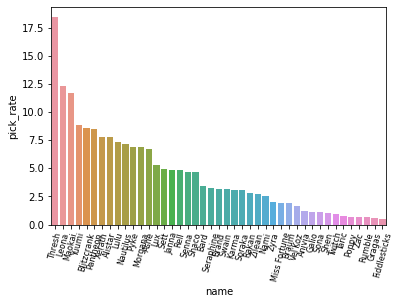

In [17]:
# Make Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data = data[data['position']=='Support'].sort_values(by = 'pick_rate',
                                                                ascending = False)
            ,x = 'name', y = 'pick_rate')
plt.xticks(rotation = 75, size = 8)
plt.savefig('Pick Rate Of Supporters.png')

In [18]:
img = openpyxl.drawing.image.Image('Pick Rate Of Supporters.png')
ws2.add_image(img, 'A15')

Function


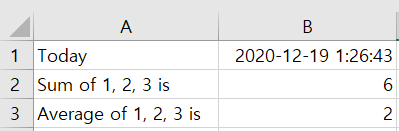

In [19]:
import datetime

ws3['A1'] = 'Today'
ws3['B1'] = datetime.datetime.today()

ws3['A2'] = 'Sum of 1, 2, 3 is'
ws3['B2'] = "=SUM(1, 2, 3)"

ws3['A3'] = 'Average of 1, 2, 3 is'
ws3['B3'] = "= AVERAGE(1, 2, 3)"

Save Workbook

In [20]:
wb.save('LoL data.xlsx')